In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("/home/bethtian/fintech545/FinTech545_Spring2025/Projects/Project01/DailyReturn.csv")
df= df.set_index('Date')
df.head()

,SPY,AAPL,NVDA,MSFT,AMZN,META,GOOGL,AVGO,TSLA,GOOG,...,SBUX,MMC,MDT,CB,LMT,KKR,MU,PLD,LRCX,EQIX
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-04,0.007720,0.010314,0.030318,-0.043743,-0.007924,0.021084,-0.011670,0.012214,0.051249,-0.011037,...,0.036001,0.019460,0.034628,0.016442,-0.002157,0.030420,0.076037,0.037892,0.019696,0.026626
2023-01-05,-0.011413,-0.010605,-0.032816,-0.029638,-0.023726,-0.003376,-0.021344,-0.009318,-0.029039,-0.021869,...,-0.000287,-0.018143,-0.011609,-0.003743,0.001196,-0.014553,0.009410,-0.035140,-0.012782,-0.028714
2023-01-06,0.022932,0.036794,0.041640,0.011785,0.035611,0.024263,0.013225,0.060196,0.024651,0.016019,...,0.021641,0.029012,0.010371,0.023707,-0.008028,0.016456,0.037653,0.033673,0.067640,0.020163
2023-01-09,-0.000567,0.004089,0.051753,0.009736,0.014870,-0.004230,0.007786,-0.019612,0.059349,0.007260,...,-0.018277,-0.003334,-0.041059,-0.023377,-0.030111,0.030303,-0.007222,-0.005058,0.016080,0.010713
2023-01-10,0.007013,0.004456,0.017981,0.007617,0.028732,0.027188,0.004544,-0.003398,-0.007681,0.004955,...,0.012030,0.000000,0.017410,0.005637,0.007190,0.009871,0.015082,-0.000086,0.013660,0.020539


# A. Create a routine for calculating an exponentially weighted covariance matrix. 

In [5]:
def cal_ewcov(data, lambda_param = 0.97):
    
    n = len(data)
    n_assets = len(data.columns)
    
    weights = np.array([(1-lambda_param)*lambda_param**i for i in range(n-1, -1, -1)])
    weights = weights/np.sum(weights)
    
    means = np.average(data, weights = weights, axis = 0)
    
    weighted_means = np.average(data, weights=weights, axis=0)
    
    cov_matrix = np.zeros((n_assets, n_assets))
    
    for i in range(n_assets):
        for j in range(n_assets):
            dev_i = data.iloc[:, i] - weighted_means[i]
            dev_j = data.iloc[:, j] - weighted_means[j]
            
            cov_ij = np.sum(weights * dev_i * dev_j)
            cov_matrix[i, j] = cov_ij
    
    return pd.DataFrame(cov_matrix, index=data.columns, columns=data.columns)  
   

In [6]:
ewcov = cal_ewcov(df)
ewcov

,SPY,AAPL,NVDA,MSFT,AMZN,META,GOOGL,AVGO,TSLA,GOOG,...,SBUX,MMC,MDT,CB,LMT,KKR,MU,PLD,LRCX,EQIX
SPY,0.000072,0.000054,0.000124,0.000080,0.000112,0.000081,0.000088,0.000176,0.000234,0.000088,...,0.000040,0.000031,0.000029,0.000027,0.000026,0.000135,0.000148,0.000059,0.000127,0.000053
AAPL,0.000054,0.000139,0.000041,0.000084,0.000081,0.000056,0.000071,0.000140,0.000173,0.000071,...,0.000008,0.000014,0.000008,0.000026,0.000003,0.000041,0.000055,0.000060,0.000084,0.000038
NVDA,0.000124,0.000041,0.000663,0.000133,0.000196,0.000186,0.000145,0.000223,0.000235,0.000148,...,0.000038,0.000012,0.000008,-0.000009,0.000027,0.000220,0.000304,0.000014,0.000322,0.000050
MSFT,0.000080,0.000084,0.000133,0.000161,0.000174,0.000126,0.000122,0.000196,0.000279,0.000123,...,0.000017,0.000025,0.000018,0.000024,-0.000015,0.000105,0.000151,0.000061,0.000152,0.000054
AMZN,0.000112,0.000081,0.000196,0.000174,0.000323,0.000188,0.000201,0.000295,0.000373,0.000199,...,0.000019,0.000021,0.000013,0.000015,-0.000008,0.000188,0.000173,0.000057,0.000185,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KKR,0.000135,0.000041,0.000220,0.000105,0.000188,0.000119,0.000161,0.000276,0.000481,0.000163,...,0.000088,0.000069,0.000058,0.000070,0.000064,0.000418,0.000253,0.000065,0.000193,0.000098
MU,0.000148,0.000055,0.000304,0.000151,0.000173,0.000165,0.000167,0.000897,0.000479,0.000180,...,0.000072,-0.000004,0.000026,-0.000006,0.000035,0.000253,0.001475,0.000156,0.000707,0.000085
PLD,0.000059,0.000060,0.000014,0.000061,0.000057,0.000014,0.000025,0.000064,0.000121,0.000030,...,0.000083,0.000044,0.000059,0.000033,0.000029,0.000065,0.000156,0.000250,0.000084,0.000088
LRCX,0.000127,0.000084,0.000322,0.000152,0.000185,0.000229,0.000158,0.000583,0.000443,0.000162,...,0.000071,0.000006,0.000017,0.000009,-0.000018,0.000193,0.000707,0.000084,0.000738,0.000073


# B. Vary λ. Use PCA and plot the cumulative variance explained of λ in (0,1) by each eigenvalue for each λ chosen.

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [8]:
def pca_cum_cal(lambda_values):
    result = []
    for lambda_param in lambda_values:
        cov_matrix = cal_ewcov(df, lambda_param)
        
        pca = PCA()
        pca.fit(cov_matrix)
        
        cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
        result.append(cum_var_ratio)
    return result

I would like to use two sets of lambda. One set of lambda has large range, from 0.1 to 1, with interval 0.1. The other set of lambda has small range, from 0.8 to 1, with interval 0.04. We have already known that the optimal lambda is 0.97 or 0.94, so the large lambda may be more practical in business or daily analysis. The goal of two sets is to reflect the relationship in a general large range and a specific practical small range. 

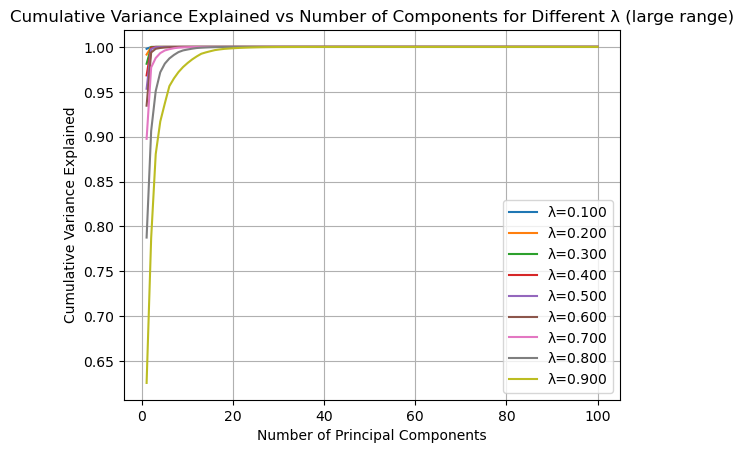

In [9]:
lambda_values_1 = np.arange(0.1, 1.0, 0.1)
result_1 = pca_cum_cal(lambda_values_1)


plt.figure()
for i, lambda_param in enumerate(lambda_values_1):
    plt.plot(range(1, len(result_1[i]) + 1), 
             result_1[i], 
             label=f'λ={lambda_param:.3f}')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained vs Number of Components for Different λ (large range)')
plt.legend()
plt.grid(True)
plt.show()

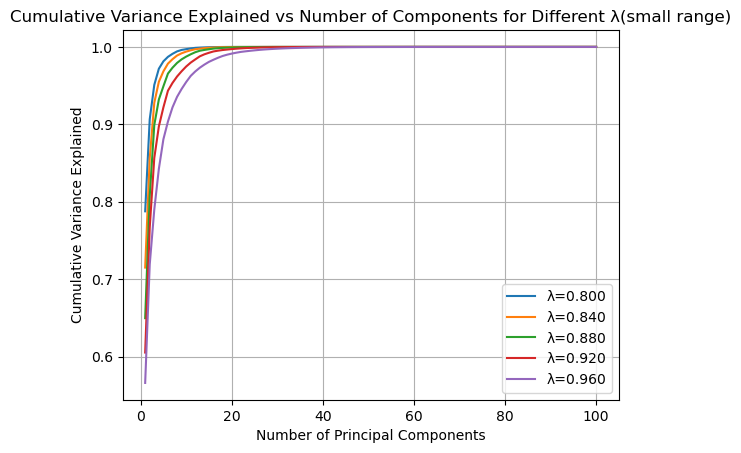

In [10]:
lambda_values_s= np.arange(0.8, 1.0, 0.04)
result_s = pca_cum_cal(lambda_values_s)


plt.figure()
for i, lambda_param in enumerate(lambda_values_s):
    plt.plot(range(1, len(result_s[i]) + 1), 
             result_s[i], 
             label=f'λ={lambda_param:.3f}')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained vs Number of Components for Different λ(small range)')
plt.legend()
plt.grid(True)
plt.show()

# C. What does this tell us about the values of λ and the effect it has on the covariance matrix?

The higher the lambda is, more principle components needed to explain the variance. The smaller lambda means the weight of recent data is higher, leading to more concentrated data.